In [64]:
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import pickle
import copy

import rksd.exp_utils as exp_utils

plt.rcParams["mathtext.fontset"] = "cm"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
dim = 1
res_stats = pickle.load(open(f"../data/tau/stats_d{dim}.pkl", "rb"))
tau_infty = pickle.load(open(f"../data/tau/tau_infty_res_d{dim}.pkl", "rb"))

eps_ls = list(res_stats.keys())
n_ls = list(res_stats[eps_ls[0]].keys())

In [108]:
eps0 = 0.1
plot_df_ls = []

methods = {"tilted_r_boot": "R-KSD"}

for eps in eps_ls:
    for i, n in enumerate(n_ls):
        plot_df = {"eps": [], "n": [], "tau_infty": [], "method": [], "rej": []}
        for m, m_label in methods.items():
            rr = res_stats[eps][n][m]
            plot_df["tau_infty"].extend(np.array(rr["tau"]).tolist())
            plot_df["eps"].extend([eps] * len(rr["nonsq_stat"]))
            plot_df["n"].extend([n] * len(rr["nonsq_stat"]))
            plot_df["rej"].extend(rr["rej"])
            plot_df["method"].extend([m_label] * len(rr["nonsq_stat"]))
        
        plot_df = pd.DataFrame(plot_df)
        plot_df_ls.append(plot_df)

plot_df = pd.concat(plot_df_ls, ignore_index=True)

/tmp/ipykernel_3115312/2433731112.py:17: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.lineplot(


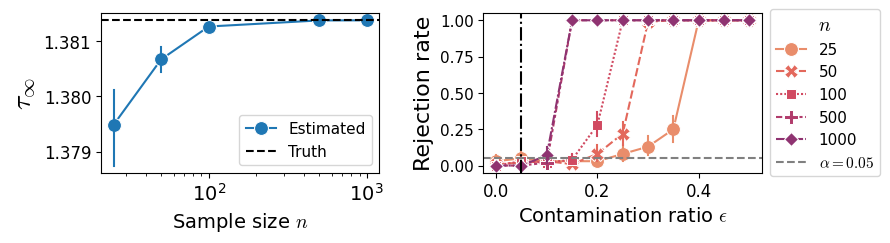

In [110]:
_, axes = plt.subplots(ncols=2, figsize=(9, 2.5))

ax = axes[0]
plot_df_cp = plot_df.loc[plot_df.eps == 0.05].copy()
# plot_df_cp = plot_df.copy()
plot_df_cp["method"] = "Estimated"
_ = sns.lineplot(ax=ax, data=plot_df_cp, x="n", y="tau_infty", style="method", markers=True, err_style="bars", markersize=10)
ax.axhline(tau_infty, linestyle="--", color="k", label="Truth")
ax.tick_params(axis="both", labelsize=14)
ax.set_xscale("log")
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel(r"Sample size $n$", fontsize=14)
ax.set_ylabel(r"$\tau_\infty$", fontsize=20)
lgd = ax.legend(fontsize=11)

ax = axes[1]
_ = sns.lineplot(
    ax=ax, data=plot_df.loc[plot_df.eps <= 0.5], x="eps", y="rej", hue="n", style="n", markers=True, err_style="bars", markersize=10,
    palette=sns.color_palette("flare")
)
ax.axhline(0.05, linestyle="--", color="grey", label=r"$\alpha = 0.05$")
eps0 = 0.05
ax.axvline(eps0, linestyle="-.", color="k")
ax.set_ylim(-0.05, 1.05)
ax.tick_params(axis="both", labelsize=12)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xlabel(r"Contamination ratio $\epsilon$", fontsize=14)
ax.set_ylabel("Rejection rate", fontsize=16)
lg = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)
lg.set_title(r"$n$", prop={"size": 14})

plt.tight_layout(w_pad=3.)
# plt.savefig("../figs/tau_infty.pdf", bbox_extra_artists=(lg,), bbox_inches="tight")